<a href="https://colab.research.google.com/github/asau12/asau_Advancemachinelearning/blob/main/Assignment_1_IMDB_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import keras
import matplotlib 
import matplotlib.pyplot as plt

from keras import models
from keras import layers

In [3]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [5]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
#mapping words to an integer index
word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

1654784/1641221 [==============================] - 0s 0us/step


Data Preparation

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# training data and test data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

# **Assignment questions**
## 1. You used two hidden layers. Try using one or three hidden layers, and see how doing so affects validation and test accuracy.

In [10]:
#Building model with 2, 3 and 4 Layers

model_2L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_4L = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


In [11]:
#Compiling the models

model_2L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_3L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model_4L.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [12]:
#Creating validation set from the original training sets
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
#Training the models
history_2L = model_2L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_3L = model_3L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_4L = model_4L.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
model_2L.summary()
model_3L.summary()
model_4L.summary()

#Tells us about the training loss and accuracy as well as validation loss and accuracy of the three models
history_dict2L = history_2L.history
history_dict3L = history_3L.history
history_dict4L = history_4L.history

No handles with labels found to put in legend.


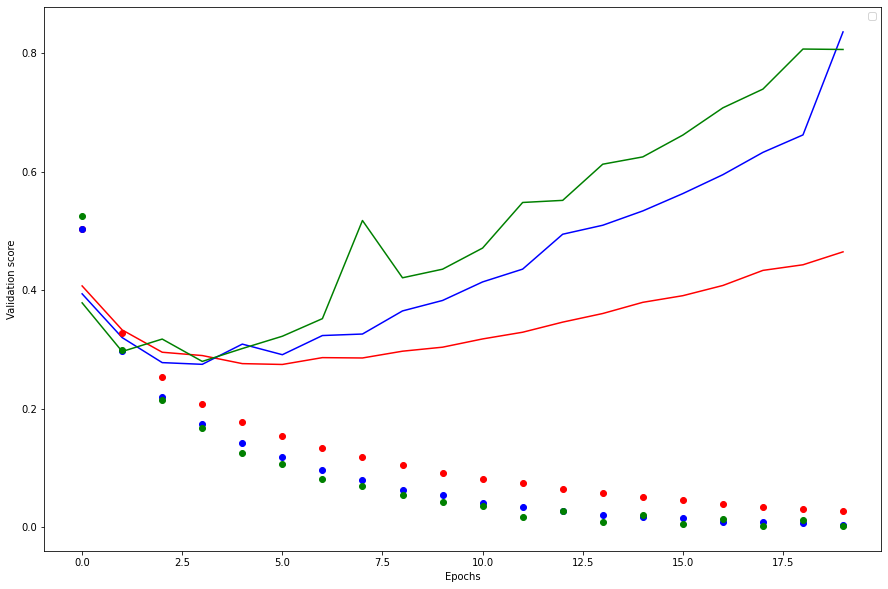

In [15]:
# Plotting the training and validation loss
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(history_dict2L['val_loss'], 'r', history_dict3L['val_loss'], 'b',history_dict4L['val_loss'], 'g')
plt.plot(history_dict2L['loss'], 'r', history_dict3L['loss'], 'b',history_dict4L['loss'], 'g', marker='o', linestyle='none')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.legend()


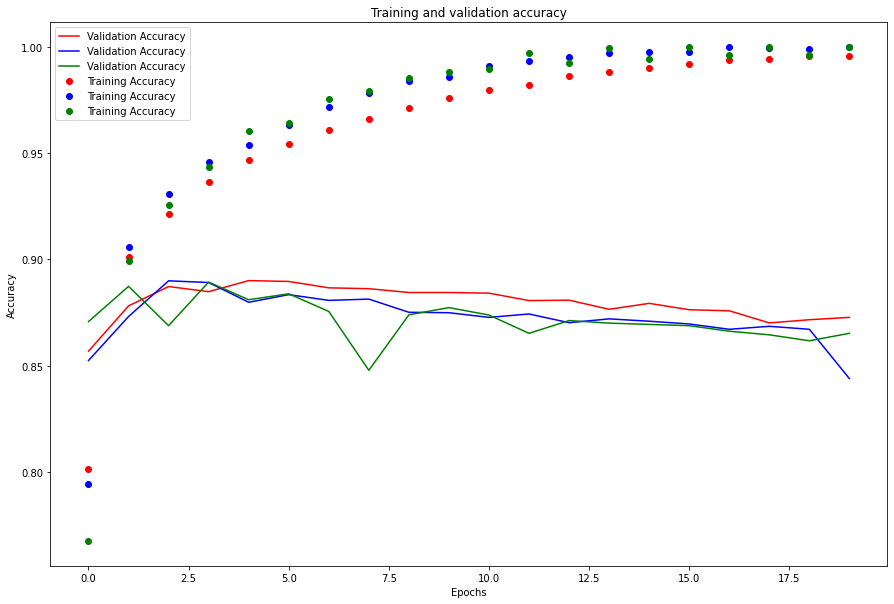

In [18]:
# Plotting the training and validation accuracy
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

 
plt.plot(history_dict2L['val_accuracy'], 'r', history_dict3L['val_accuracy'], 'b',history_dict4L['val_accuracy'], 'g',  label="Validation Accuracy")
plt.plot(history_dict2L['accuracy'], 'r', history_dict3L['accuracy'], 'b',history_dict4L['accuracy'], 'g', marker='o', linestyle='none', label="Training Accuracy")

plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### Observation and Answer - The techniques implementing less than three number of hidden layers mostly had a loss in accuracy while the architecture implementing more than three numbers of hidden layers were found not to be optimal in terms of time complexity. The number of hidden layers is reduced it has a direct impact on the accuracy of the network as with the complex problem having less number of hidden layers it might be possible that network will not be trained properly. On the other hand when the number of hidden layers cross the optimal number of hidden layers (three layers), time complexity increases in orders of magnitude as compared to the accuracy gain.

## **2.Try using. layers with more hidden units or fewer hidden units: 32 units, 64 units, and so on**

In [22]:
model_3LH = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3LH.compile(optimizer="rmsprop",loss="binary_crossentropy",
              metrics=["accuracy"])

history_3LH = model_3LH.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 109ms/step - loss: 0.4830 - accuracy: 0.7742 - val_loss: 0.3666 - val_accuracy: 0.8478
Epoch 2/20
30/30 [==============================] - 2s 65ms/step - loss: 0.2656 - accuracy: 0.9030 - val_loss: 0.3859 - val_accuracy: 0.8338
Epoch 3/20
30/30 [==============================] - 2s 63ms/step - loss: 0.1981 - accuracy: 0.9279 - val_loss: 0.2710 - val_accuracy: 0.8891
Epoch 4/20
30/30 [==============================] - 2s 62ms/step - loss: 0.1442 - accuracy: 0.9499 - val_loss: 0.2840 - val_accuracy: 0.8852
Epoch 5/20
30/30 [==============================] - 2s 64ms/step - loss: 0.1154 - accuracy: 0.9589 - val_loss: 0.3147 - val_accuracy: 0.8791
Epoch 6/20
30/30 [==============================] - 2s 62ms/step - loss: 0.0882 - accuracy: 0.9711 - val_loss: 0.4172 - val_accuracy: 0.8617
Epoch 7/20
30/30 [==============================] - 2s 59ms/step - loss: 0.0690 - accuracy: 0.9779 - val_loss: 0.3624 - val_accuracy: 0.8795
Epoch 8/20
3

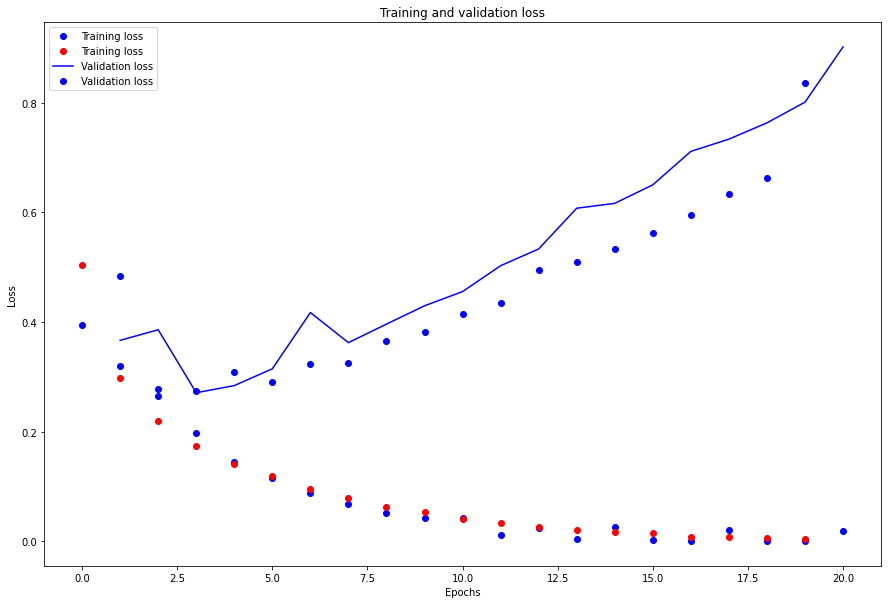

In [34]:
history_dict_3LH = history_3LH.history

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

#loss_values = history_dict_3LH["loss"]
#val_loss_values = history_dict_3LH["val_loss"]
epochs = range(1, len(history_dict_3LH["loss"]) + 1)
plt.plot(epochs, history_dict_3LH["loss"], "bo",  history_dict3L['loss'], 'ro' ,label="Training loss")
plt.plot(epochs, history_dict_3LH["val_loss"], "b", history_dict3L['val_loss'], 'bo', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()


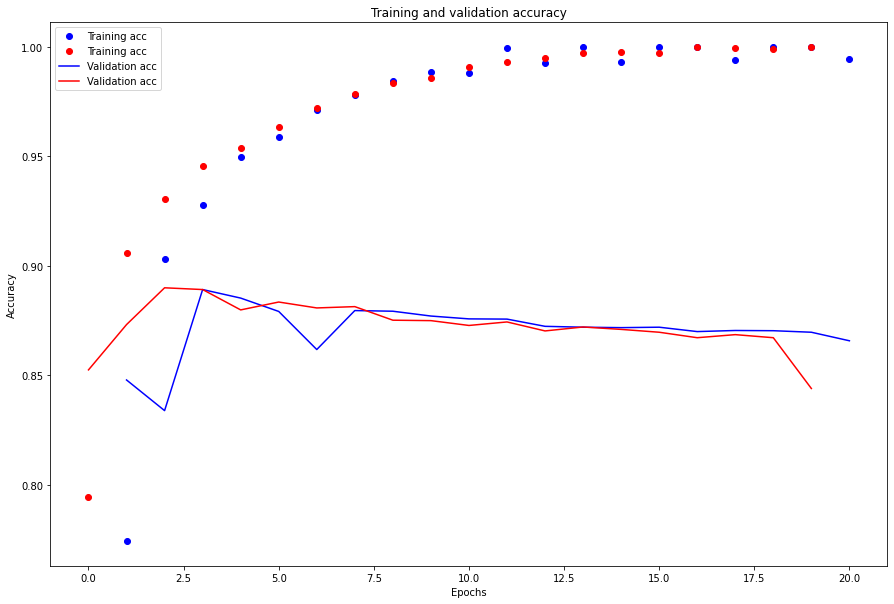

In [32]:
#This pot shows comparision of two three layers models with different number of nodes.

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.clf()
#acc = history_dict_3LH["accuracy"]
#val_acc = history_dict_3LH["val_accuracy"]
plt.plot(epochs,history_dict_3LH["accuracy"], "bo",history_dict3L['accuracy'], 'ro', label="Training acc")
plt.plot(epochs, history_dict_3LH["val_accuracy"], "b",history_dict3L['val_accuracy'], 'r', label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

3. Try using the 'mse' loss function instead of 'binary_crossentropy'.

In [25]:
model_3LM = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model_3LM.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

# Training your model
history_3LM = model_3LM.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict_3LM = history_3LM.history


Epoch 1/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1700 - accuracy: 0.7742 - val_loss: 0.1258 - val_accuracy: 0.8464
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0914 - accuracy: 0.9017 - val_loss: 0.0975 - val_accuracy: 0.8808
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.0643 - accuracy: 0.9313 - val_loss: 0.0864 - val_accuracy: 0.8886
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0505 - accuracy: 0.9475 - val_loss: 0.0843 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0405 - accuracy: 0.9586 - val_loss: 0.0826 - val_accuracy: 0.8894
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0343 - accuracy: 0.9636 - val_loss: 0.0878 - val_accuracy: 0.8811
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0280 - accuracy: 0.9735 - val_loss: 0.0882 - val_accuracy: 0.8786
Epoch 8/20
30

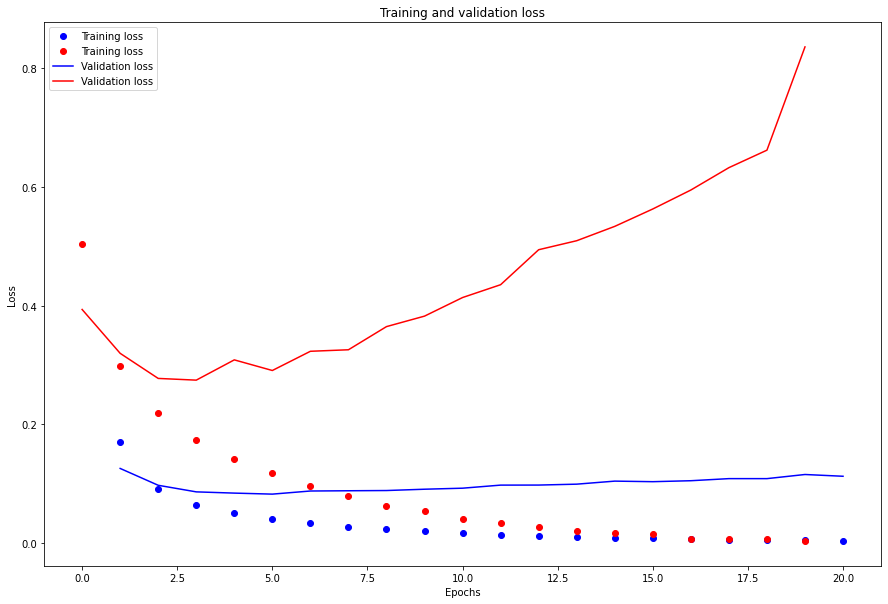

In [39]:
#Plotting the training and validation loss for two model with different loss function

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, history_dict_3LM["loss"], "bo",history_dict3L['loss'],'ro ', label="Training loss")
plt.plot(epochs, history_dict_3LM["val_loss"], "b",history_dict3L['val_loss'],'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

<Figure size 432x288 with 0 Axes>

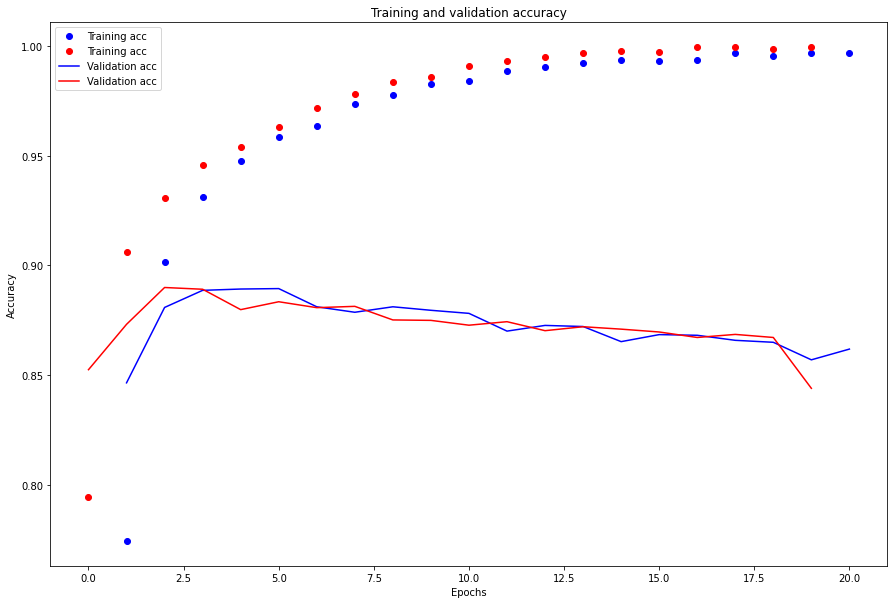

In [38]:
# Plotting the training and validation accuracy
plt.clf()

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)

plt.plot(epochs,history_dict_3LM["accuracy"], "bo", history_dict3L['accuracy'], 'ro', label="Training acc")
plt.plot(epochs,  history_dict_3LM["val_accuracy"], "b", history_dict3L['val_accuracy'], 'r',label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'

In [ ]:
4.Try using the tanh activation (an activation that was popular in the early days of neural networks) instead of 'relu'

model_t = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model_t.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])

history_t = model_t.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict_t = history_t.history
#loss_values = history_dict_t["loss"]
#val_loss_values = history_dict_t["val_loss"]
epochs = range(1, len(history_dict_t["loss"]) + 1)
plt.plot(epochs, history_dict_t["loss"], "bo", label="Training loss")
plt.plot(epochs, history_dict_t["val_loss"], "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()



# Plotting the training and validation accuracy
plt.clf()
acc = history_dict_t["accuracy"]
val_acc = history_dict_t["val_accuracy"]
plt.plot(epochs, history_dict_t["accuracy"], "bo", label="Training acc")
plt.plot(epochs, history_dict_t["val_accuracy"], "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

5.Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [ ]:
model_5 = keras.Sequential([
    #layers.Dropout(0.2),                        
    layers.Dense(20, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(15, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [ ]:
# Compiling the model

model_5.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
history_5 = model_5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [ ]:
history_dict_5 = history_5.history
loss_values = history_dict_5["loss"]
val_loss_values = history_dict_5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()